# Sentiment Analysis on Food Reviews

Le recensioni online sono diventate un'importante fonte di informazioni sia per i produttori che per i consumatori, con aziende che cercano di comprendere meglio il feedback fornito dai clienti su prodotti e marchi e singoli utenti che cercano informazioni per supportare le loro decisioni di acquisto quotidiane. Dato l'uso diffuso di computer e dispositivi mobili, la maggior parte dei quali connessi a Internet, sempre più persone condividono pensieri, sentimenti ed esperienze. Questa crescente quantità di informazioni ha portato al rapido sviluppo del campo della Sentiment Analysis, che si concentra sull'identificazione automatica di opinioni, emozioni, valutazioni e giudizi, insieme alla loro polarità (positiva o negativa).

## Libraries and Packages

In [ ]:
!pip install afinn

In [ ]:
import nltk
nltk.download('punkt') #Puteggiatura
nltk.download('stopwords')  #Stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading and Exploring the dataset

In [ ]:
df = pd.read_csv("/content/food.tsv", sep='\t', encoding='latin-1')

In [ ]:
print(df.head(5))
print(df.columns)
print(df.shape)

    productid  ...                                               text
0  B001E4KFG0  ...  I have bought several of the Vitality canned d...
1  B00813GRG4  ...  Product arrived labeled as Jumbo Salted Peanut...
2  B000LQOCH0  ...  This is a confection that has been around a fe...
3  B000UA0QIQ  ...  If you are looking for the secret ingredient i...
4  B006K2ZZ7K  ...  Great taffy at a great price.  There was a wid...

[5 rows x 4 columns]
Index(['productid', 'userid', 'score', 'text'], dtype='object')
(35172, 4)


In [ ]:
#controllo se ci sono missing values
df.isnull().sum(axis=0)

productid    0
userid       0
score        0
text         0
dtype: int64

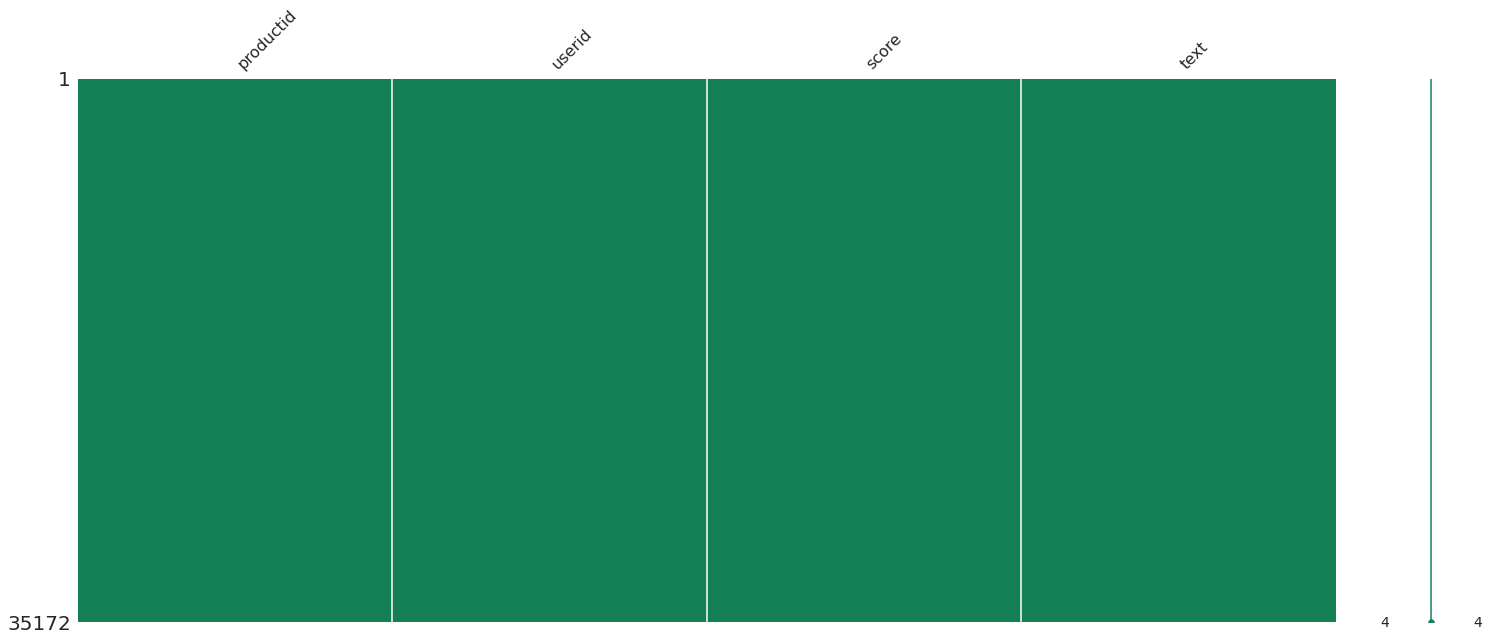

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(df, color=(0.08, 0.50, 0.33))

Raggruppo secondo product_id e poi secondo a user_id

In [ ]:
df.productid.unique() 
freq = df.productid.value_counts()
print(freq)

B002QWP89S    632
B0013NUGDE    564
B007M83302    564
B000KV61FC    556
B000PDY3P0    487
             ... 
B0043H35N0      1
B001KQ09PO      1
B004BPR774      1
B001SAXX0K      1
B003U92X3A      1
Name: productid, Length: 4224, dtype: int64


In [ ]:
productid_freq = {'productid':list(freq.index), 'freq':freq.values}
productid_freq = pd.DataFrame(productid_freq)
a = productid_freq.groupby("freq")

In [ ]:
prodotti = []
freqrevp = []
for chiave, valore in a: 
  prodotti.append(a.get_group(chiave).shape[0])
  freqrevp.append(chiave)

In [ ]:
d = {"prodotti": prodotti, "freq_rev_p": freqrevp}
d_p = pd.DataFrame(d)
d_p = d_p.sort_values(by=["freq_rev_p"], ascending=True)
d_p = d_p.sort_values(by=["prodotti"], ascending=True)

In [ ]:
from itertools import chain
bins = list(chain(range(0, 50, 10), range(50, 800, 100)))
d_p['binned'] = pd.cut(d_p['freq_rev_p'], bins)

In [ ]:
a = d_p.groupby("binned").sum()

In [ ]:
a

,prodotti,freq_rev_p
binned,,
"(0, 10]",3658,55
"(10, 20]",273,155
"(20, 30]",109,255
"(30, 40]",53,355
"(40, 50]",29,408
"(50, 150]",67,3955
"(150, 250]",18,2684
"(250, 350]",10,3080
"(350, 450]",0,0


In [ ]:
d_p.groupby(['binned'])['freq_rev_p'].apply(lambda x: x.cumsum())

121    632
63      73
87     201
86     328
85     451
      ... 
4       45
3       49
2       52
1       54
0       55
Name: freq_rev_p, Length: 122, dtype: int64

In [ ]:
a = a.sort_values("prodotti")
a = a.sort_index()

In [ ]:
arr_plot = []
for i in range(len(a.prodotti)):
  arr_plot.append( [i]*a.prodotti[i] )

arr_plot_flat = [item for sublist in arr_plot for item in sublist]
print(arr_plot_flat)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

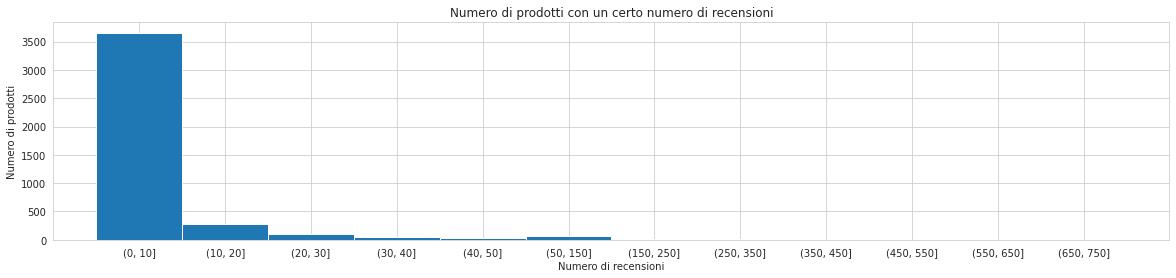

In [ ]:
plt.figure(figsize=(20,4))
ax = plt.hist(arr_plot_flat, density=False, align="left", bins=np.arange(13)-1)
plt.xlim([-1, 12])
plt.xticks(list(range(0, 13)))
plt.xticks(ticks=np.arange(len(a.index)), labels=a.index)
plt.title('Numero di prodotti con un certo numero di recensioni')
plt.xlabel('Numero di recensioni')
plt.ylabel('Numero di prodotti')
plt.show()

In [ ]:
print(freq.mean())

8.326704545454545


Si vede che raggruppare per prodotto e' abbastanza inutile

In [ ]:
df.userid.unique() 
freq_userid = df.userid.value_counts()
print(freq_userid.head(50))

AY12DBB0U420B     30
A1Z54EM24Y40LL    28
A3OXHLG6DIBRW8    24
A2SZLNSI5KOQJT    21
A1YUL9PCJR3JTY    20
A31N6KB160O508    18
A3PJZ8TU8FDQ1K    18
A1TMAVN4CEM8U8    17
A281NPSIMI1C2R    15
A3HPCRD9RX351S    14
A2PNOU7NXB1JE4    12
A250AXLRBVYKB4    11
A1XGFW5016CGQI    11
A2TN9C5E4A0I3F    11
AY1EF0GOH80EK     11
A1ZH9LWMX5UCFJ    11
A35R32TA60XD57    11
AQQLWCMRNDFGI     11
AF3BYMPWKWO8F     11
A25C2M3QF9G7OQ    10
A2R6RA8FRBS608    10
A2TJG4N8LNJW23    10
A2YB7DLC3FOR7W    10
A2MUGFV2TDQ47K    10
AJD41FBJD9010     10
A2OEUROGZDTXUJ    10
A1LTNRGWZFY4C9    10
ACYR6O588USK       9
A3A1OA237FOZFK     9
A1IU7S4HCK1XK0     9
AKMEY1BSHSDG7      9
A3094EPI56GKZ6     9
ADS5APY1NKTL4      9
A2MNB77YGJ3CN0     9
A2E3WMF9RWW2X2     8
A2FRFAQCWZJT3Q     8
A1WX42M589VAMQ     8
A2A1XYSB692L6J     8
AMRMK86X3PKXD      8
A1Q7A78VSQ5GQ4     8
A2UQIQUOAB47OT     8
A1GQAKL9CGQLP1     8
A33AQPJYH7UUXR     8
A3M174IC0VXOS2     8
A3RMGIKUWGPZOK     8
A2NLZ3M0OJV9NX     8
A1P2XYD265YE21     8
A36WGHR8TO5DK

In [ ]:
userid_freq = {'userid':list(freq_userid.index), 'freq':freq_userid.values}
userid_freq = pd.DataFrame(userid_freq)
a = userid_freq.groupby("freq")

In [ ]:
utenti = []
freqrevu = []
for chiave, valore in a: 
  utenti.append(a.get_group(chiave).shape[0])
  freqrevu.append(chiave)

In [ ]:
d = {"utenti": utenti, "freq_rev_u": freqrevu}
d_u = pd.DataFrame(d)
d_u = d_u.sort_values(by=["freq_rev_u"], ascending=False)
d_u = d_u.sort_values(by=["utenti"], ascending=True)

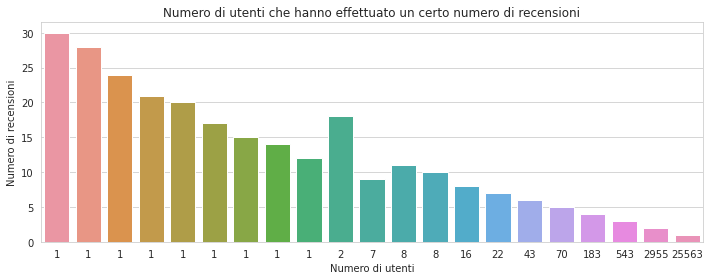

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
pos = np.arange(len(d_u.utenti))
ax = sns.barplot(x = pos, y = d_u.freq_rev_u)
plt.xticks(ticks=np.arange(len(d_u.utenti)), labels=d_u.utenti)
plt.title('Numero di utenti che hanno effettuato un certo numero di recensioni')
ax.set(xlabel='Numero di utenti', ylabel='Numero di recensioni')
plt.tight_layout()
plt.show()

In [ ]:
print( freq_userid.mean() )
print( freq_userid.var() )

1.1951476434809203
0.5267183323189129


Vuol dire che ci sono poche persone che scrivono tante review

## Lexicon-based approach

Il lessico **AFINN** è un elenco di termini inglesi classificati manualmente per valenza con un numero intero compreso tra -5 (negativo) e +5 (positivo) da Finn Årup Nielsen tra il 2009 e il 2011.


In [ ]:
from afinn import Afinn
afinn = Afinn(emoticons=True)

df['afinn'] = df["text"].apply(afinn.score)
print(df.head(5))

    productid  ... afinn
0  B001E4KFG0  ...  16.0
1  B00813GRG4  ...  -2.0
2  B000LQOCH0  ...   3.0
3  B000UA0QIQ  ...   3.0
4  B006K2ZZ7K  ...   9.0

[5 rows x 5 columns]


In [ ]:
x = df.afinn.value_counts()
x.groupby(np.sign(x.index)).agg("sum") #netta prevalenza di recensioni positive

-1.0     2934
 0.0     1983
 1.0    30255
Name: afinn, dtype: int64

In [ ]:
min(df.afinn)
max(df.afinn)

98.0

## Textual Preprocessing

**NLTK** (Natural Language Toolkit) e' una delle piattaforme piu usate per lavorare con dati scritti in linguaggionaturale su Python. Questa libreria e' stata pertanto utilizzata per eseguire una tokenizzazione del testo delle recensioni e successivamente per identificare stopwords e segni di punteggiatura.

In [ ]:
import nltk
nltk.download('punkt') #Puteggiatura
nltk.download('stopwords')  #Stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text = df['text']
print(text.iloc[20])
print(word_tokenize(text.iloc[20]))

My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner.
['My', 'husband', 'is', 'a', 'Twizzlers', 'addict', '.', 'We', "'ve", 'bought', 'these', 'many', 'times', 'from', 'Amazon', 'because', 'we', "'re", 'government', 'employees', 'living', 'overseas', 'and', 'ca', "n't", 'get', 'them', 'in', 'the', 'country', 'we', 'are', 'assigned', 'to', '.', 'They', "'ve", 'always', 'been', 'fresh', 'and', 'tasty', ',', 'packed', 'well', 'and', 'arrive', 'in', 'a', 'timely', 'manner', '.']


## Preprocessing

Ora vogliamo pulire il testo.
Vogliamo identificare urls, hashtags, smileys, etc come caratteri unici e non separarli durante la tokenizazione.

In [ ]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [ ]:
#text = text.apply(lambda x: x.lower())
text_tokenized = [preprocess(i, lowercase=True) for i in text]
text_tokenized = pd.Series(text_tokenized)
text_tokenized

0        [i, have, bought, several, of, the, vitality, ...
1        [product, arrived, labeled, as, jumbo, salted,...
2        [this, is, a, confection, that, has, been, aro...
3        [if, you, are, looking, for, the, secret, ingr...
4        [great, taffy, at, a, great, price, ., there, ...
                               ...                        
35167    [once, i, tasted, hazelnut, coffee, ,, i, was,...
35168    [has, maxwell, house, quit, making, this, coff...
35169    [nutty, ,, smooth, ,, subtle, ,, with, a, wond...
35170    [price, was, right, and, the, taste, very, goo...
35171    [this, sauce, gives, you, authentic, tonkatsu,...
Length: 35172, dtype: object

In [ ]:
from collections import Counter

def get_counter(series):
  flat_list = [item for sublist in series for item in sublist]
  c = Counter(flat_list)
  return sorted(c.items(), key=lambda x: x[1], reverse=True)

In [ ]:
get_counter(text_tokenized)[:20]

[('.', 171618),
 ('the', 103443),
 (',', 89733),
 ('i', 84916),
 ('and', 71538),
 ('a', 66568),
 ('to', 55943),
 ('it', 51869),
 ('of', 43024),
 ('is', 40793),
 ('this', 37913),
 ('for', 30645),
 ('in', 29144),
 ('<br />', 28801),
 ('my', 26070),
 ('!', 24506),
 ('that', 23280),
 ('but', 21006),
 ('have', 19643),
 ('with', 19610)]

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = [item for item in stop if item not in ["not", "nor", "against"]]
text_tokenized_stop = text_tokenized.apply(lambda x: [item for item in x if item not in stop])
text_tokenized_stop

get_counter(text_tokenized_stop)[:20]

[('.', 171618),
 (',', 89733),
 ('<br />', 28801),
 ('!', 24506),
 ('not', 18592),
 ('like', 14289),
 ('"', 11696),
 ('good', 11429),
 ('coffee', 9878),
 ('great', 9849),
 ('taste', 9612),
 ('one', 9588),
 ('-', 9550),
 ('(', 9319),
 (')', 9224),
 ('product', 8344),
 ('flavor', 8269),
 ('love', 7360),
 ('would', 7162),
 ('tea', 6478)]

In [ ]:
import string
from nltk import wordpunct_tokenize

punctuation = string.punctuation
#print(punctuation)
text_tokenized_stop_punct = text_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])
text_tokenized_stop_punct

get_counter(text_tokenized_stop_punct)[:20]

[('<br />', 28801),
 ('not', 18592),
 ('like', 14289),
 ('good', 11429),
 ('coffee', 9878),
 ('great', 9849),
 ('taste', 9612),
 ('one', 9588),
 ('product', 8344),
 ('flavor', 8269),
 ('love', 7360),
 ('would', 7162),
 ('tea', 6478),
 ('food', 6265),
 ('get', 6057),
 ('really', 5735),
 ('much', 5190),
 ('time', 4802),
 ('use', 4711),
 ('amazon', 4676)]

In [ ]:
stop = set(stop)
#Aggiunta di stopwords
stop.add("The")
stop.add("And")
stop.add("I")
stop.add('...')
stop.add('…')
stop.add('br') # <br />
stop.add('href')
stop.add('http')


stop = list(stop)

text_tokenized_stop_punct = text_tokenized_stop_punct.apply(lambda x: [item for item in x if item not in stop])

#rimozione di "<...>"
text_tokenized_stop_punct = text_tokenized_stop_punct.apply(lambda x: [item for item in x if (item[0]!='<' and item[-1]!='>' not in item )])

#rimozione dei numeri
text_tokenized_stop_punct = text_tokenized_stop_punct.apply(lambda x: [item for item in x if not any(c.isdigit() for c in item)]) 

#rimozione di "i'..."
text_tokenized_stop_punct = text_tokenized_stop_punct.apply(lambda x: [item for item in x if(len(item) > 1 and item[0]!='i' and item[1]!='\'' not in item)]) 


get_counter(text_tokenized_stop_punct)[:20]

[('not', 18592),
 ('like', 14289),
 ('good', 11429),
 ('coffee', 9878),
 ('great', 9849),
 ('taste', 9612),
 ('one', 9588),
 ('product', 8344),
 ('flavor', 8269),
 ('love', 7360),
 ('would', 7162),
 ('tea', 6478),
 ('food', 6265),
 ('get', 6057),
 ('really', 5735),
 ('much', 5190),
 ('time', 4802),
 ('use', 4711),
 ('amazon', 4676),
 ('also', 4595)]

In [ ]:
post_processing_text = df.copy(deep=True)

for i in range(len(post_processing_text)):
  post_processing_text.at[i, 'text'] = ' '.join(text_tokenized_stop_punct[i])

In [ ]:
df.score.value_counts() / df.shape[0]

5.0    0.625981
4.0    0.144177
1.0    0.091493
3.0    0.081315
2.0    0.057034
Name: score, dtype: float64

## Visualize words

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import numpy as np

from wordcloud import WordCloud

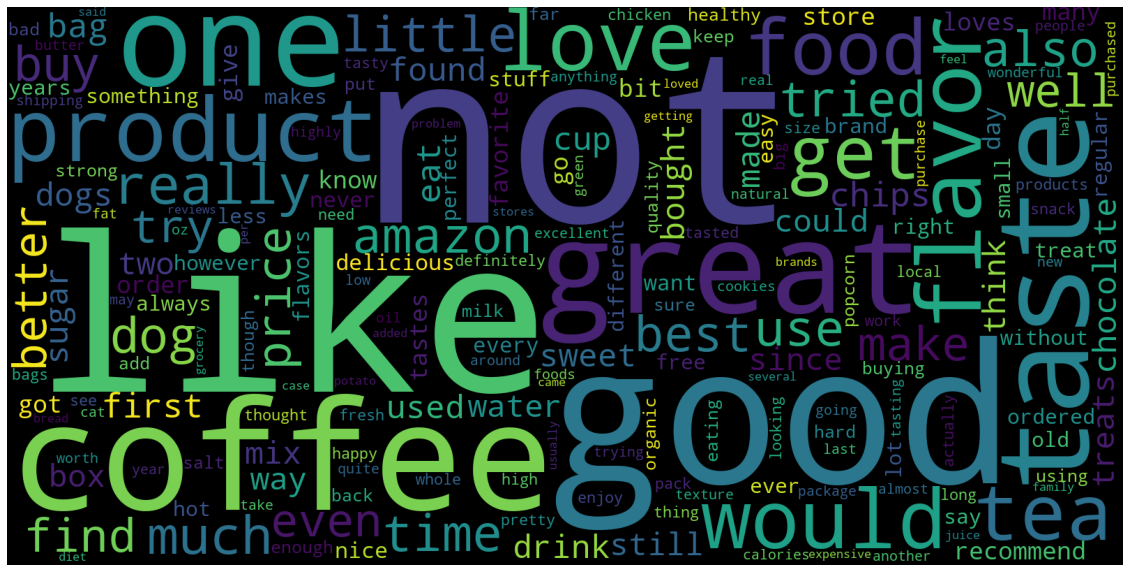

In [ ]:
flat_list = [item for sublist in text_tokenized_stop_punct for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

### Confronto tra distribuzione di parole top reviewers vs worst reviewers


Parole più utilizzate dai top reviewers (numero di review > 10).


In [ ]:
freq_userid = pd.DataFrame( df['userid'].value_counts() )
freq_userid = freq_userid.to_dict() #converts to dictionary
df['n_review'] = df['userid'].map(freq_userid)
freq_userid = freq_userid['userid']
#Now we have a dict with {'user_id':n_reviews}
print(freq_userid)

{'AY12DBB0U420B': 30, 'A1Z54EM24Y40LL': 28, 'A3OXHLG6DIBRW8': 24, 'A2SZLNSI5KOQJT': 21, 'A1YUL9PCJR3JTY': 20, 'A3PJZ8TU8FDQ1K': 18, 'A31N6KB160O508': 18, 'A1TMAVN4CEM8U8': 17, 'A281NPSIMI1C2R': 15, 'A3HPCRD9RX351S': 14, 'A2PNOU7NXB1JE4': 12, 'A1ZH9LWMX5UCFJ': 11, 'A35R32TA60XD57': 11, 'A250AXLRBVYKB4': 11, 'AF3BYMPWKWO8F': 11, 'A2TN9C5E4A0I3F': 11, 'AY1EF0GOH80EK': 11, 'A1XGFW5016CGQI': 11, 'AQQLWCMRNDFGI': 11, 'AJD41FBJD9010': 10, 'A1LTNRGWZFY4C9': 10, 'A2YB7DLC3FOR7W': 10, 'A2MUGFV2TDQ47K': 10, 'A2OEUROGZDTXUJ': 10, 'A2R6RA8FRBS608': 10, 'A2TJG4N8LNJW23': 10, 'A25C2M3QF9G7OQ': 10, 'AKMEY1BSHSDG7': 9, 'ACYR6O588USK': 9, 'ADS5APY1NKTL4': 9, 'A3094EPI56GKZ6': 9, 'A2MNB77YGJ3CN0': 9, 'A3A1OA237FOZFK': 9, 'A1IU7S4HCK1XK0': 9, 'A1GQAKL9CGQLP1': 8, 'AMRMK86X3PKXD': 8, 'A2A1XYSB692L6J': 8, 'A2E3WMF9RWW2X2': 8, 'A33AQPJYH7UUXR': 8, 'A2UQIQUOAB47OT': 8, 'A2NLZ3M0OJV9NX': 8, 'A3RMGIKUWGPZOK': 8, 'A26A64X86VL1R4': 8, 'A1Q7A78VSQ5GQ4': 8, 'A36WGHR8TO5DKT': 8, 'A1WX42M589VAMQ': 8, 'A1P2XYD265YE21'

In [ ]:
def extract(dic, x):
  #Ritorna key+value di un dizionario if value > x
  diz = {}
  for key in dic:
    if( dic[key] > x):
      diz[key] = {'n_review': dic[key]}
  return diz

In [ ]:
top_reviewers = extract(freq_userid, 10)
top_reviewers = pd.DataFrame(top_reviewers)
print(top_reviewers.columns)
top_reviewers_df = post_processing_text.loc[post_processing_text["userid"].isin(top_reviewers)]
top_reviewers_df.text = top_reviewers_df.text.str.split()
#top_reviewers_df
get_counter(top_reviewers_df.text)[:20]

Index(['AY12DBB0U420B', 'A1Z54EM24Y40LL', 'A3OXHLG6DIBRW8', 'A2SZLNSI5KOQJT',
       'A1YUL9PCJR3JTY', 'A3PJZ8TU8FDQ1K', 'A31N6KB160O508', 'A1TMAVN4CEM8U8',
       'A281NPSIMI1C2R', 'A3HPCRD9RX351S', 'A2PNOU7NXB1JE4', 'A1ZH9LWMX5UCFJ',
       'A35R32TA60XD57', 'A250AXLRBVYKB4', 'AF3BYMPWKWO8F', 'A2TN9C5E4A0I3F',
       'AY1EF0GOH80EK', 'A1XGFW5016CGQI', 'AQQLWCMRNDFGI'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[('not', 255),
 ('one', 204),
 ('good', 192),
 ('magnesium', 182),
 ('tea', 175),
 ('like', 171),
 ('coffee', 145),
 ('food', 130),
 ('chips', 117),
 ('also', 115),
 ('flavor', 104),
 ('taste', 104),
 ('rda', 98),
 ('recommended', 76),
 ('organic', 73),
 ('body', 73),
 ('well', 71),
 ('much', 70),
 ('make', 69),
 ('would', 67)]

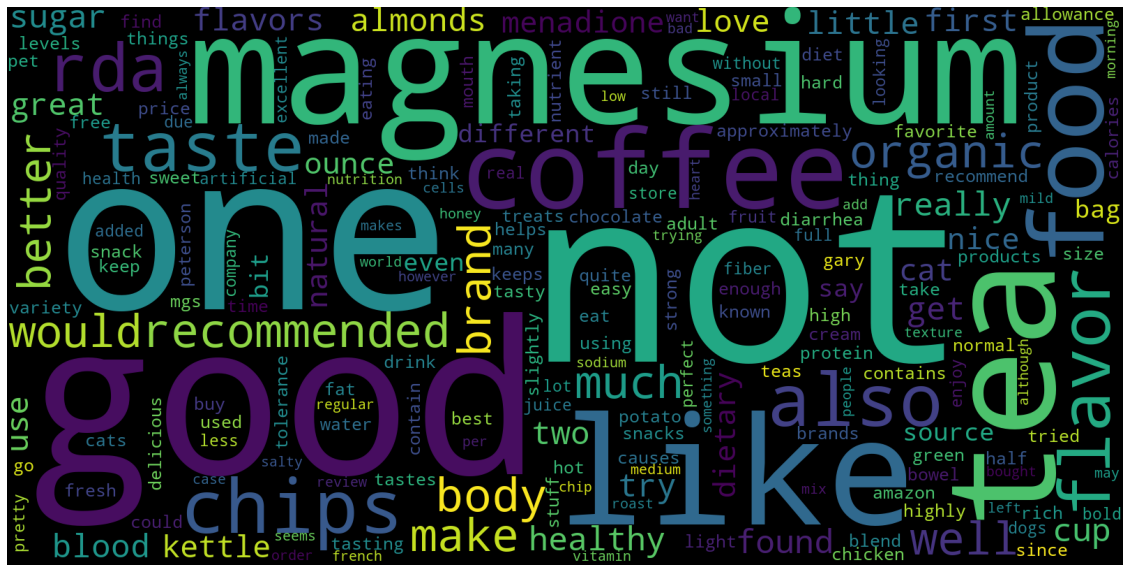

In [ ]:
flat_list = [item for sublist in top_reviewers_df.text for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

Parole più utilizzate dai worst reviewers (numero di review = 1).

In [ ]:
worst_reviewers = {}
for key in freq_userid:
  if( freq_userid[key] < 2):
    worst_reviewers[key] = {'n_review': freq_userid[key]}
worst_reviewers = pd.DataFrame(worst_reviewers)
worst_reviewers_df = post_processing_text.loc[post_processing_text["userid"].isin(worst_reviewers)]
worst_reviewers_df.text = worst_reviewers_df.text.str.split()
get_counter(worst_reviewers_df.text)[:20]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[('not', 12290),
 ('like', 9170),
 ('good', 7780),
 ('great', 7228),
 ('one', 6446),
 ('product', 6445),
 ('coffee', 6275),
 ('taste', 6237),
 ('love', 5140),
 ('would', 4889),
 ('flavor', 4822),
 ('tea', 4709),
 ('food', 4342),
 ('get', 4320),
 ('really', 3823),
 ('use', 3567),
 ('much', 3566),
 ('time', 3563),
 ('amazon', 3450),
 ('dog', 3273)]

In [ ]:
worst_reviewers.shape[1] / df.shape[0]

0.7267997270556125

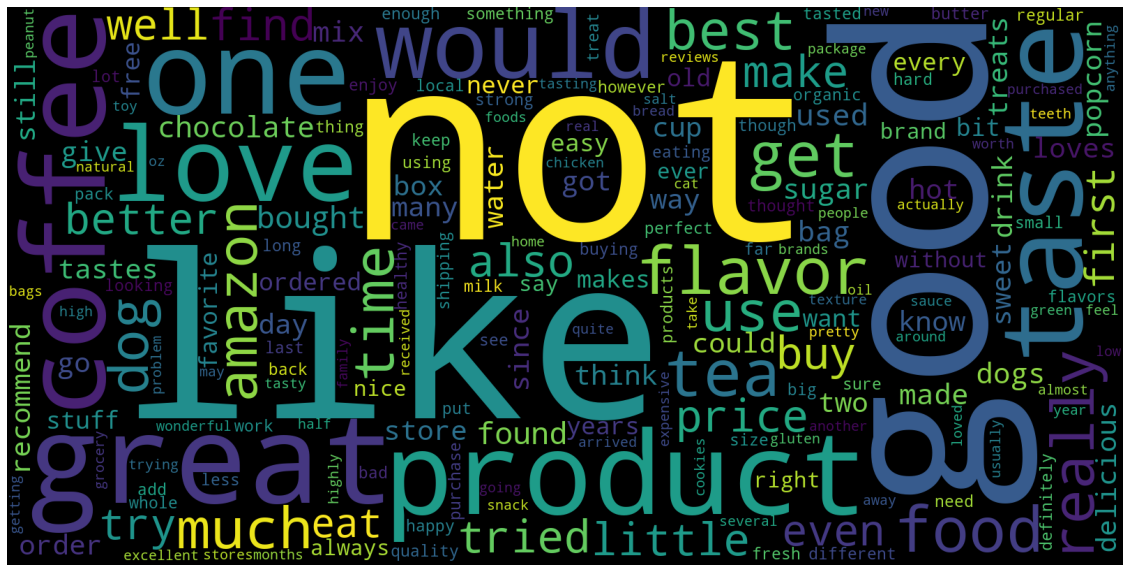

In [ ]:
flat_list = [item for sublist in worst_reviewers_df.text for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

## Lexicon-based approach (after the Preprocessing)

Dopo il preprocessing vogliamo vedere i risultati.

In [ ]:
post_processing_text['afinn'] = post_processing_text["text"].apply(afinn.score)

In [ ]:
print( df.head(5) ) #old
print("\n\n")
print(post_processing_text.head(5) ) #new
#Non ci sono cambiamenti radicali ma ora dovrebbbe esser piu' veloce.

    productid  ... afinn
0  B001E4KFG0  ...  16.0
1  B00813GRG4  ...  -2.0
2  B000LQOCH0  ...   3.0
3  B000UA0QIQ  ...   3.0
4  B006K2ZZ7K  ...   9.0

[5 rows x 5 columns]



    productid  ... afinn
0  B001E4KFG0  ...  16.0
1  B00813GRG4  ...  -2.0
2  B000LQOCH0  ...   3.0
3  B000UA0QIQ  ...   3.0
4  B006K2ZZ7K  ...   9.0

[5 rows x 5 columns]


In [ ]:
import seaborn as sns

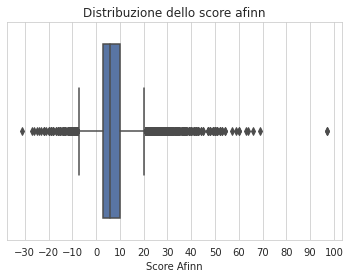

In [ ]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid")
ax = sns.boxplot(x=post_processing_text['afinn'], palette="deep")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title('Distribuzione dello score afinn')
plt.xlabel('Score Afinn')
plt.show()

In [ ]:
np.percentile(post_processing_text.afinn, [25, 50, 75])


array([ 3.,  6., 10.])

In [ ]:
post_processing_text.afinn.mean()

7.114437620834755

Text(0, 0.5, 'Frequenza assoluta')

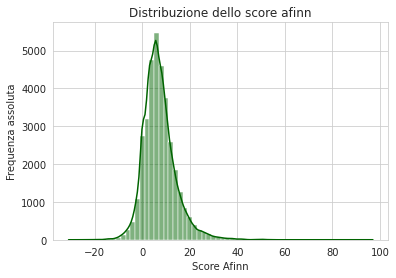

In [ ]:
sns.histplot(post_processing_text.afinn, stat="count", element="bars", binwidth=2, kde=True, color="darkgreen")
plt.title('Distribuzione dello score afinn')
plt.xlabel('Score Afinn')
plt.ylabel('Frequenza assoluta')

In [ ]:
#numero di recensioni positive, neutre e negative
x = post_processing_text.afinn.value_counts()
x.groupby(np.sign(x.index)).agg('sum')

#ORA 
#-1.0     2805
# 0.0     2036
# 1.0    30331

#PRIMA
#-1.0     2934
# 0.0     1983
# 1.0    30255

-1.0     2805
 0.0     2036
 1.0    30331
Name: afinn, dtype: int64

### Normalization of Afinn 

Calcoliamo l'errore tra il sentimento e il voto dato. Prima dobbiamo normalizzare il sentiment score.

Il rate e' in [1.0, 5.0], dobbiamo normalizzare il Sentiment score in questi intervalli.

Il problema e' che Afinn non ha range ma puo' andare da -inf a +inf.

Ci sono 3 approcci possibili:
1.   si fa la normalizzazione rispetto al max e al min degli Afinn trovati
2.   si divide Afinn per il numero di parole analizzate, ora il risultao e' tra -5 e +5 e si normalizza
3. Equal-depth (frequency) partitioning



In [ ]:
#Opzione 1 (SCARTATA)
max_afinn = max(post_processing_text['afinn'])
min_afinn = min(post_processing_text['afinn'])

for i in range(len(post_processing_text)):
  post_processing_text.at[i, 'afinn_norm_1'] = ( ( post_processing_text.at[i, 'afinn'] - min_afinn ) / (max_afinn - min_afinn) ) * (5-1) + 1

print(post_processing_text['afinn_norm_1'] )
print( max(post_processing_text['afinn_norm_1']) )
print( min(post_processing_text['afinn_norm_1']) )


0        2.46875
1        1.90625
2        2.06250
3        2.06250
4        2.25000
          ...   
35167    2.09375
35168    1.96875
35169    2.31250
35170    2.18750
35171    2.06250
Name: afinn_norm_1, Length: 35172, dtype: float64
5.0
1.0


In [ ]:
#Opzione 2 (SCARTATA)
for i in range(len(post_processing_text)):
  post_processing_text.at[i, 'afinn_norm_2'] = post_processing_text.at[i, 'afinn'] / len( post_processing_text.at[i, 'text'].split() )

min_norm_2 = min(post_processing_text['afinn_norm_2'])
max_norm_2 = max(post_processing_text['afinn_norm_2'])

for i in range(len(post_processing_text)):
  post_processing_text.at[i, 'afinn_norm_2'] = ( ( post_processing_text.afinn_norm_2[i] - min_norm_2 ) / (max_norm_2 - min_norm_2) ) * (5-1) + 1

print(post_processing_text['afinn_norm_2'] )
print( max(post_processing_text['afinn_norm_2']) )
print( min(post_processing_text['afinn_norm_2']) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


0        3.463768
1        2.925926
2        3.050000
3        3.117647
4        3.461538
           ...   
35167    3.102564
35168    3.000000
35169    3.261905
35170    3.388889
35171    3.117647
Name: afinn_norm_2, Length: 35172, dtype: float64
5.0
1.0


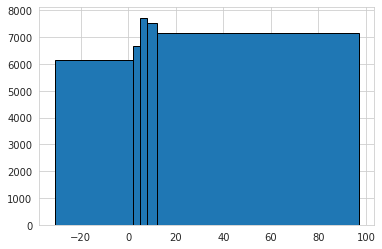

(array([-31.,   2.,   5.,   8.,  12.,  97.]),
 array([6125., 6679., 7720., 7505., 7143.]))

In [ ]:
#Opzione 3: Equal-depth (frequency) partitioning (SCARTATA)

#define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist( post_processing_text.afinn, equalObs(post_processing_text.afinn, 5), edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
bins, n

### Scelta migliore

Abbiamo pensato che l'opzione 2 fosse la migliore in quanto le altre opzioni erano basate sul corpus. Normalizzare rispetto al corpus, in presenza di outlier, porta ad una compressione sui valori centrali.

In [ ]:
#Opzione 4 (SCELTA)
def words_taken_by_afin(phrase):
  splitted = phrase.split()
  count = 0
  for word in splitted:
    if afinn.score(word) != 0:
      count = count + 1
  return count

for i in range(len(post_processing_text)):
  post_processing_text.at[i, 'afinn_norm_2_ok'] = post_processing_text.at[i, 'afinn'] / words_taken_by_afin(post_processing_text.at[i, 'text'])


print("Numeri NAN: ")
print(sum(np.isnan(post_processing_text['afinn_norm_2_ok'])))

post_processing_text['afinn_norm_2_ok'] = post_processing_text['afinn_norm_2_ok'].fillna(0) # I NaN a Zero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Numeri NAN: 
1119


In [ ]:
min_norm_2 = min(post_processing_text['afinn_norm_2_ok'])
max_norm_2 = max(post_processing_text['afinn_norm_2_ok'])
print(min_norm_2)
print(max_norm_2)

for i in range(len(post_processing_text)):
  post_processing_text.at[i, 'afinn_norm_2_ok_normalized'] = ( ( post_processing_text.afinn_norm_2_ok[i] + 5 ) / 10 ) * (5-1) + 1

print(post_processing_text['afinn_norm_2_ok_normalized'] )
print( max(post_processing_text['afinn_norm_2_ok_normalized']) )
print( min(post_processing_text['afinn_norm_2_ok_normalized']) )

-4.0
5.0
0        3.914286
1        2.200000
2        3.240000
3        4.200000
4        4.200000
           ...   
35167    3.533333
35168    3.000000
35169    3.488889
35170    3.933333
35171    3.600000
Name: afinn_norm_2_ok_normalized, Length: 35172, dtype: float64
5.0
1.4


In [ ]:
# Ora si arrotonda, essendo che gli score sono interi tra 1 e 5
post_processing_text['afinn_norm_2_ok_normalized'] = post_processing_text["afinn_norm_2_ok_normalized"].round()
print(post_processing_text['afinn_norm_2_ok_normalized'])

0        4.0
1        2.0
2        3.0
3        4.0
4        4.0
        ... 
35167    4.0
35168    3.0
35169    3.0
35170    4.0
35171    4.0
Name: afinn_norm_2_ok_normalized, Length: 35172, dtype: float64


In [ ]:
x = post_processing_text.afinn_norm_2_ok_normalized.value_counts()
x.groupby(x.index).agg('sum')

1.0        3
2.0      900
3.0    11297
4.0    22840
5.0      132
Name: afinn_norm_2_ok_normalized, dtype: int64

In [ ]:
x = post_processing_text.score.value_counts()
x.groupby(x.index).agg('sum')

1.0     3218
2.0     2006
3.0     2860
4.0     5071
5.0    22017
Name: score, dtype: int64

In [ ]:
post_processing_text.afinn_norm_2_ok_normalized.mean()

3.6311270328670533

## Supervised Machine Learning approach

Per eseguire la Sentiment Analysis supervisionata, dovremmo utilizzare modelli di machine learning supervisionati. **Scikit-learn** è un modulo Python con algoritmi di apprendimento automatico integrati.

Innanzitutto, gli attributi testuali dovrebbero essere convertiti in una rappresentazione numerica noi abbiamo scelto la rappresentazione bag-of-word.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=None, lowercase=True, max_features=5000) #crea la rappresentazione a bag of word
#max_feature: massimo numero di parole contenute nella bag of words

bow = count_vect.fit_transform(text_tokenized_stop_punct.apply(lambda x: " ".join(x)))
#fit_tranform: va a eseguire i fit (creazione della rappresentazione bag of words, decide le parole da utilizzare nella bag of word) e trasforma i documenti come rappresentazione bag of word
#fit_transorm: takes phrases not list or tokens
#le due funzioni fit e transform possono anche essere separate (per non ritrainare gli algoritmi ogni volta)
print(len(text_tokenized_stop_punct))
print(bow.shape)
print(bow.toarray())

35172
(35172, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Per eseguire un'attività di apprendimento automatico, dividiamo i dati di training per ottenere un set di valutazione tramite la funzione **model_selection** incorporata di Scikit-learn. Tutto quello che dobbiamo fare è fornire i dati e assegnare una percentuale di allenamento.

In [ ]:
"""Risultato poco utile ai fini della nostra ricerca
from sklearn.model_selection import train_test_split

#X: bag of words (documenti)
#y: valore di sentiment, etichette
X_train, X_test, y_train, y_test  = train_test_split(
        bow.toarray(), 
        df.score,
        train_size=0.80, 
        random_state=1234) #fissa il seed

print(len(X_train), len(X_test))
"""

28137 7035


### Linear Classifier 
Ora possiamo costruire il classificatore per questo dataset.

Useremo la classe **LogisticRegression** di Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, KFold

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

model = LogisticRegression(max_iter = 1000) #istanzia il modello
#scoring=['precision_macro', 'recall_macro']

### Performance measures considering "score"

Score ha un intervallo da 1 a 5, compresi.

Il modulo **sklearn.metrics** implementa funzioni che valutano l'errore di previsione per scopi specifici.

In [ ]:
#scores = cross_val_score(model, bow.toarray(), df.score, cv=kf) #cv è il numero di split

In [ ]:
#print(scores)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #accuratezza: 0.67

[0.67121574 0.66734903]
Accuracy: 0.67 (+/- 0.00)


In [ ]:
#cv_results = cross_validate(model, bow.toarray(), df.score, scoring=scoring, 
#                            cv=kf, return_train_score=False)
#cv_results

#precision: 0.46
#recall: 0.42

{'fit_time': array([140.70461035, 143.52284122]),
 'score_time': array([0.44855905, 0.39440084]),
 'test_precision_macro': array([0.45932792, 0.46467108]),
 'test_recall_macro': array([0.42132815, 0.43188805])}

In [ ]:
def ml(X, y): 
  for train_index, val_index in kf.split(X):
    model.fit(X[train_index], y[train_index])
    pred = model.predict(X[val_index])
    print(confusion_matrix(y[val_index], pred)) #matrice di confusione
    print(classification_report(y[val_index], pred)) #metriche e modello

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
from sklearn.metrics import confusion_matrix, classification_report

X = bow.toarray()
y = post_processing_text.score

#operazione molto lenta, eseguire solo se necessario
ml(X, y) #effettuo la crossvalidation
"""

[[ 188   31   29   11   64]
 [  38   54   33   20   51]
 [  29   34   80   37  103]
 [   8   21   53  124  288]
 [  47   19   50  137 1969]]
              precision    recall  f1-score   support

         1.0       0.61      0.58      0.59       323
         2.0       0.34      0.28      0.30       196
         3.0       0.33      0.28      0.30       283
         4.0       0.38      0.25      0.30       494
         5.0       0.80      0.89      0.84      2222

    accuracy                           0.69      3518
   macro avg       0.49      0.46      0.47      3518
weighted avg       0.66      0.69      0.67      3518

[[ 161   44   23   14   65]
 [  38   51   27   14   59]
 [  38   34   77   53   89]
 [  12   12   50  128  287]
 [  34   25   50  131 2002]]
              precision    recall  f1-score   support

         1.0       0.57      0.52      0.55       307
         2.0       0.31      0.27      0.29       189
         3.0       0.34      0.26      0.30       291
         4.0

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
from sklearn import model_selection
#operazione molto lenta, eseguire solo se necessario
post_processing_text["initial_pred_ML_score"] =  model_selection.cross_val_predict(model, X, y, cv=kf)
"""

In [ ]:
#post_processing_text.initial_pred_ML_score.value_counts()

5.0    24844
4.0     3465
1.0     3000
3.0     2281
2.0     1582
Name: initial_pred_ML_score, dtype: int64

In [ ]:
#post_processing_text.score.value_counts()

5.0    22017
4.0     5071
1.0     3218
3.0     2860
2.0     2006
Name: score, dtype: int64

In [ ]:
#post_processing_text[["initial_pred_ML_score"]].to_csv("/content/MLinizialescore.csv") #salvataggio per non dover nel caso, rieseguire la cross-validation

### Performance measures considering "sentiment" 

Score positivi, negativi e neutri.

In [ ]:
#colonna sentiment che riposta i valori positivi, neutri e negativi di score
post_processing_text["sentiment"] = np.sign(post_processing_text["score"]-3)

In [ ]:
"""
scores1 = cross_val_score(model, bow.toarray(), df.sentiment, cv=kf) #cv è il numero di split
print(scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))
#accuratezza: 0.82
"""

'\nscores1 = cross_val_score(model, bow.toarray(), df.sentiment, cv=kf) #cv è il numero di split\nprint(scores1)\nprint("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))\n#accuratezza: 0.82\n'

In [ ]:
"""
cv_results1 = cross_validate(model, bow.toarray(), df.sentiment, scoring=scoring, 
                            cv=kf, return_train_score=False)
print(cv_results1)

#precision: 0.62
#recall: 0.58
"""

'\ncv_results1 = cross_validate(model, bow.toarray(), df.sentiment, scoring=scoring, \n                            cv=kf, return_train_score=False)\nprint(cv_results1)\n\n#precision: 0.62\n#recall: 0.58\n'

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
X = bow.toarray()
y = post_processing_text.sentiment

#operazione molto lenta, eseguire solo se necessario
ml(X, y) #effettuo la crossvalidation
"""

[[ 333   57  144]
 [  66   88  140]
 [  80   74 2536]]
              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       534
         0.0       0.40      0.30      0.34       294
         1.0       0.90      0.94      0.92      2690

    accuracy                           0.84      3518
   macro avg       0.67      0.62      0.64      3518
weighted avg       0.83      0.84      0.83      3518

[[ 326   53  166]
 [  66   59  158]
 [  87   94 2509]]
              precision    recall  f1-score   support

        -1.0       0.68      0.60      0.64       545
         0.0       0.29      0.21      0.24       283
         1.0       0.89      0.93      0.91      2690

    accuracy                           0.82      3518
   macro avg       0.62      0.58      0.60      3518
weighted avg       0.81      0.82      0.81      3518

[[ 297   50  163]
 [  83   69  159]
 [  94   69 2533]]
              precision    recall  f1-score   support

        -1.0      

In [ ]:
#operazione molto lenta, eseguire solo se necessario
#post_processing_text["initial_pred_ML_sentiment"] =  model_selection.cross_val_predict(model, X, y, cv=kf)

In [ ]:
#post_processing_text[["initial_pred_ML_sentiment"]].to_csv("/content/MLinizialesentiment.csv") #salvataggio per non dover nel caso, rieseguire la cross-validation

## Legame tra **Afinn** e **Score**

Per calcolare l'errore facciamo una semplice differenza tra lo score dato dall'utente e lo score di afinn.

In [ ]:
def err_abs(score, sentiment_score): 
  err_list = []
  N = len(score)
  for i in range(0,N):
    err_list.append( abs( score[i] - sentiment_score[i] ) )
  return err_list

In [ ]:
post_processing_text['err_abs'] = err_abs(post_processing_text['score'], post_processing_text['afinn_norm_2_ok_normalized'])
print(post_processing_text.head(5))
print(min(post_processing_text['err_abs']))
print(max(post_processing_text['err_abs']))

    productid          userid  score  ...  err  afinn_sentiment  sentiment
0  B001E4KFG0  A3SGXH7AUHU8GW    5.0  ...  1.0              1.0        1.0
1  B00813GRG4  A1D87F6ZCVE5NK    1.0  ... -1.0             -1.0       -1.0
2  B000LQOCH0   ABXLMWJIXXAIN    4.0  ...  1.0              0.0        1.0
3  B000UA0QIQ  A395BORC6FGVXV    2.0  ... -2.0              1.0       -1.0
4  B006K2ZZ7K  A1UQRSCLF8GW1T    5.0  ...  1.0              1.0        1.0

[5 rows x 13 columns]
0.0
4.0


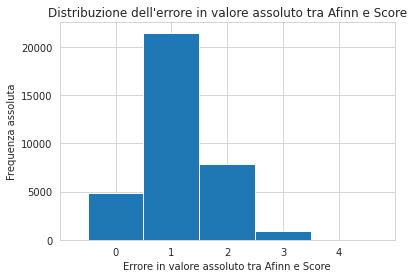

In [ ]:
plt.hist(post_processing_text['err_abs'], density=False, align="left", bins=np.arange(6)-1)
plt.xticks(list(range(0, 5)))
plt.xlim([-1, 5])
plt.title('Distribuzione dell\'errore in valore assoluto tra Afinn e Score')
plt.xlabel('Errore in valore assoluto tra Afinn e Score')
plt.ylabel('Frequenza assoluta')
plt.show()

In [ ]:
count = 0
for x in post_processing_text['err_abs']:
  if( x >= 2 ):
    count = count + 1

print(count)

8771


In [ ]:
count / df.shape[0]

0.2493745024451268

**Legame tra score e afinn**

In [ ]:
post_processing_text["err"] = post_processing_text["score"] - post_processing_text["afinn_norm_2_ok_normalized"]
post_processing_text["err"].value_counts() 
#tendenzialmente score ha un valore più alto di 1 rispetto ad afinn

 1.0    18465
 2.0     5101
 0.0     4906
-1.0     3030
-2.0     2782
-3.0      704
 3.0      176
-4.0        7
 4.0        1
Name: err, dtype: int64

In [ ]:
18465 / (18465 + 3030)

0.8590369853454292

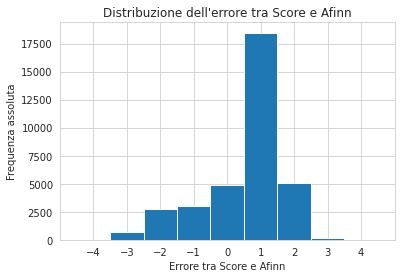

In [ ]:
plt.hist(post_processing_text["err"], density=False, align="left", bins=8)
plt.xticks(list(range(-4, 5)))
plt.xlim([-5, 5])
plt.title('Distribuzione dell\'errore tra Score e Afinn')
plt.xlabel('Errore tra Score e Afinn')
plt.ylabel('Frequenza assoluta')
plt.show()

In [ ]:
x = np.sign(post_processing_text["err"])
x.value_counts()

 1.0    23743
-1.0     6523
 0.0     4906
Name: err, dtype: int64

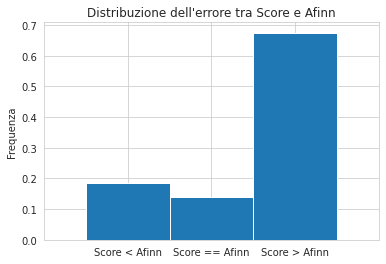

In [ ]:
plt.hist(x, density=True, histtype="bar", align="left", bins=np.arange(4)-1)
#plt.xticks(list(range(-1, 2)))
plt.xlim([-2, 2])
plt.title('Distribuzione dell\'errore tra Score e Afinn')
#plt.xlabel('Differenza tra Score e Afinn')
plt.ylabel('Frequenza')
plt.xticks(ticks=list(range(-1, 2)), labels=["Score < Afinn", "Score == Afinn", "Score > Afinn"])
plt.show()

In [ ]:
x.value_counts() / df.shape[0]
#nel 68% dei casi score > afinn
#solo nel nel 14% coincidono

 1.0    0.675054
-1.0    0.185460
 0.0    0.139486
Name: err, dtype: float64

## Valutazione delle predizioni effettuate con Afinn

Valutazioni estratte considerando tutte e 5 le classi di score.

In [ ]:
confusion = pd.crosstab(post_processing_text.score,post_processing_text.afinn_norm_2_ok_normalized)
confusion

afinn_norm_2_ok_normalized,1.0,2.0,3.0,4.0,5.0
score,,,,,
1.0,1,451,2058,701,7
2.0,0,107,1177,719,3
3.0,0,104,1358,1393,5
4.0,1,63,1666,3332,9
5.0,1,175,5038,16695,108


In [ ]:
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion.values)
accuracy

0.1394859547367224

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(post_processing_text.score, post_processing_text.afinn_norm_2_ok_normalized))

              precision    recall  f1-score   support

         1.0       0.33      0.00      0.00      3218
         2.0       0.12      0.05      0.07      2006
         3.0       0.12      0.47      0.19      2860
         4.0       0.15      0.66      0.24      5071
         5.0       0.82      0.00      0.01     22017

    accuracy                           0.14     35172
   macro avg       0.31      0.24      0.10     35172
weighted avg       0.58      0.14      0.06     35172



Valutazioni considerando tre classi: poritiva, neutra e negativa.

In [ ]:
post_processing_text["afinn_sentiment"] = post_processing_text["afinn_norm_2_ok_normalized"]-3

In [ ]:
confusion1 = pd.crosstab(np.sign(post_processing_text.sentiment), np.sign(post_processing_text.afinn_sentiment))
confusion1

afinn_sentiment,-1.0,0.0,1.0
sentiment,,,
-1.0,559,3235,1430
0.0,104,1358,1398
1.0,240,6704,20144


In [ ]:
accuracy1 = np.sum(np.diag(confusion1)) / np.sum(confusion1.values)
accuracy1

0.6272318890026157

In [ ]:
print(classification_report(np.sign(post_processing_text.sentiment), np.sign(post_processing_text.afinn_sentiment)))

              precision    recall  f1-score   support

        -1.0       0.62      0.11      0.18      5224
         0.0       0.12      0.47      0.19      2860
         1.0       0.88      0.74      0.80     27088

    accuracy                           0.63     35172
   macro avg       0.54      0.44      0.39     35172
weighted avg       0.78      0.63      0.66     35172



## Varianza di afinn nei casi neutri

In [ ]:
import statistics

def word_afinn(phrase): #restituisce una lista di afinn score non nulli
  splitted = phrase.split()
  a = 0
  lista = []
  for word in splitted:
    a = afinn.score(word)
    if a != 0: 
      lista.append(a)
  return lista

def sd(lista): #restituisce la deviazione standard data una lista
  if lista and len(lista)>1: 
    res = statistics.stdev(lista)
  else: 
    res = 0
  return res

In [ ]:
devstandard = []
res = []
for i in range(len(post_processing_text)):
  post_processing_text.at[i, "varianza"] = sd(word_afinn(post_processing_text.at[i, "text"]))
  if post_processing_text.at[i, "afinn_norm_2_ok_normalized"] == 3:
    devstandard.append(post_processing_text.at[i, "varianza"])
    if post_processing_text.at[i, "varianza"] == 0: 
      res.append((post_processing_text.at[i, "text"], post_processing_text.at[i, "score"]))
    #post_processing_text.at[i, 'varianza_nulli'] = sd(word_afinn(post_processing_text.at[i, 'text'])) 

In [ ]:
for i in range(len(res)):
  print(res[i]) #recensioni a varianza nulla con relativo score

In [ ]:
print(len(res)) #1582 recensioni a score 3 e varianza nulla
print(len(res)/df.shape[0])

1582
0.04497896053679063


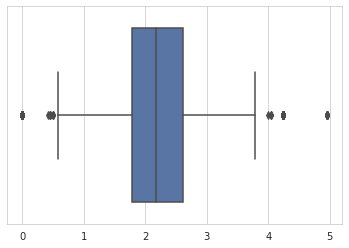

In [ ]:
#import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x=devstandard, palette="deep")

Text(0, 0.5, 'Frequenza assoluta')

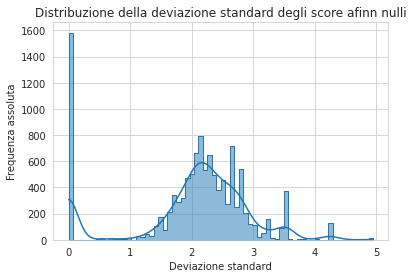

In [ ]:
sns.histplot(devstandard, stat="count", element="step", kde=True)
plt.title('Distribuzione della deviazione standard degli score afinn nulli')
plt.xlabel('Deviazione standard')
plt.ylabel('Frequenza assoluta')

In [ ]:
post_processing_text

,productid,userid,score,text,afinn,afinn_norm_1,afinn_norm_2,afinn_norm_2_ok,afinn_norm_2_ok_normalized,err_abs,err,afinn_sentiment,sentiment,varianza
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,bought several vitality canned dog food produc...,16.0,2.46875,3.463768,2.285714,4.0,1.0,1.0,1.0,1.0,0.487950
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,product arrived labeled jumbo salted peanuts p...,-2.0,1.90625,2.925926,-2.000000,2.0,1.0,-1.0,-1.0,-1.0,0.000000
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,confection around centuries light pillowy citr...,3.0,2.06250,3.050000,0.600000,3.0,1.0,1.0,0.0,1.0,2.509980
3,B000UA0QIQ,A395BORC6FGVXV,2.0,looking secret robitussin believe found got ad...,3.0,2.06250,3.117647,3.000000,4.0,2.0,-2.0,1.0,-1.0,0.000000
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,great taffy great price wide assortment yummy ...,9.0,2.25000,3.461538,3.000000,4.0,1.0,1.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35167,B000E1DSQS,A2QG0Z96HULRW7,5.0,tasted hazelnut coffee hooked coffee drink max...,4.0,2.09375,3.102564,1.333333,4.0,1.0,1.0,1.0,1.0,2.081666
35168,B000E1DSQS,A3F653OGB0ZF4X,5.0,maxwell house quit making coffee find anywhere...,0.0,1.96875,3.000000,0.000000,3.0,2.0,2.0,0.0,1.0,0.000000
35169,B000E1DSQS,AJD41FBJD9010,5.0,nutty smooth subtle wonderful aroma love coffe...,11.0,2.31250,3.261905,1.222222,3.0,2.0,2.0,0.0,1.0,2.538591
35170,B000E1DSQS,A33R5P618X7MG7,5.0,price right taste good buying harmony bay bett...,7.0,2.18750,3.388889,2.333333,4.0,1.0,1.0,1.0,1.0,0.577350


## Score medio dei prodotti

Calcoliamo ora la media dei rate per ogni prodotto.

In [ ]:
mean_score_per_prod = df.groupby('productid').size().reset_index(name='count')
mean_score_per_prod['mean'] = np.array(df.groupby('productid')['score'].mean())
print(mean_score_per_prod)
print(type(mean_score_per_prod))

       productid  count      mean
0     2734888454      2  3.500000
1     B00002NCJC      2  4.500000
2     B00002Z754      2  5.000000
3     B00005V3DC      3  5.000000
4     B000084DVR      2  5.000000
...          ...    ...       ...
4219  B009HINRX8      6  4.500000
4220  B009KP6HBM      3  4.000000
4221  B009NTCO4O     11  4.909091
4222  B009UOFU20      1  1.000000
4223  B009WSNWC4      1  5.000000

[4224 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


## Top Reviewers

Vogliamo vedere se le persone che eseguono molte review votano in linea con la media e se la loro distribuzionne di parole e' diversa dalle altre persone. 

### Identificazione Top Reviewers e ricerca causi fraudolenti

In [ ]:
freq_userid = pd.DataFrame( df['userid'].value_counts() )
freq_userid = freq_userid.to_dict() #converts to dictionary
df['n_review'] = df['userid'].map(freq_userid)
freq_userid = freq_userid['userid']
#Now we have a dict with {'user_id':n_reviews}
print(freq_userid)

{'AY12DBB0U420B': 30, 'A1Z54EM24Y40LL': 28, 'A3OXHLG6DIBRW8': 24, 'A2SZLNSI5KOQJT': 21, 'A1YUL9PCJR3JTY': 20, 'A31N6KB160O508': 18, 'A3PJZ8TU8FDQ1K': 18, 'A1TMAVN4CEM8U8': 17, 'A281NPSIMI1C2R': 15, 'A3HPCRD9RX351S': 14, 'A2PNOU7NXB1JE4': 12, 'A1ZH9LWMX5UCFJ': 11, 'AQQLWCMRNDFGI': 11, 'A250AXLRBVYKB4': 11, 'AF3BYMPWKWO8F': 11, 'A35R32TA60XD57': 11, 'A2TN9C5E4A0I3F': 11, 'AY1EF0GOH80EK': 11, 'A1XGFW5016CGQI': 11, 'AJD41FBJD9010': 10, 'A1LTNRGWZFY4C9': 10, 'A2MUGFV2TDQ47K': 10, 'A2R6RA8FRBS608': 10, 'A25C2M3QF9G7OQ': 10, 'A2OEUROGZDTXUJ': 10, 'A2YB7DLC3FOR7W': 10, 'A2TJG4N8LNJW23': 10, 'AKMEY1BSHSDG7': 9, 'ACYR6O588USK': 9, 'A1IU7S4HCK1XK0': 9, 'ADS5APY1NKTL4': 9, 'A2MNB77YGJ3CN0': 9, 'A3A1OA237FOZFK': 9, 'A3094EPI56GKZ6': 9, 'A3M174IC0VXOS2': 8, 'A3RMGIKUWGPZOK': 8, 'A2FRFAQCWZJT3Q': 8, 'A1WX42M589VAMQ': 8, 'A33AQPJYH7UUXR': 8, 'A1Q7A78VSQ5GQ4': 8, 'A2NLZ3M0OJV9NX': 8, 'A26A64X86VL1R4': 8, 'A1GQAKL9CGQLP1': 8, 'AMRMK86X3PKXD': 8, 'A2A1XYSB692L6J': 8, 'A36WGHR8TO5DKT': 8, 'A1P2XYD265YE21'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


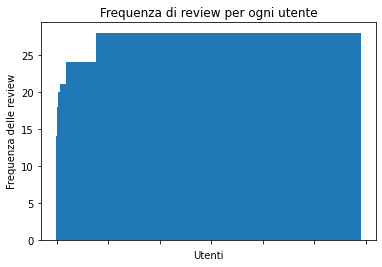

In [ ]:
#barplot di userid
arr = np.array([freq_userid[k] for k in freq_userid])
pos = np.arange(len(arr))
width = 100

plt.title('Frequenza di review per ogni utente')
plt.ylabel('Frequenza delle review')
plt.xlabel('Utenti', labelpad = 10)

ax = plt.axes()
ax.tick_params(labelbottom=False) 

plt.bar(pos, arr, width, tick_label=None)
plt.show()

Si vede come le persone in media fanno poche review (circa 1 a testa). Esiste però un'alta varianza quindi chi fa più reviews del normale, di solito ne fa molte.

In [ ]:
print("Media review a testa")
print( np.array([freq_userid[k] for k in freq_userid]).mean() )
print("Varianza")
print( np.array([freq_userid[k] for k in freq_userid]).var() )

Media review a testa
1.1951476434809203
Varianza
0.5267004343840794


In [ ]:
top_reviewers = extract(freq_userid, 10)
print(top_reviewers)
print(len(top_reviewers))

{'AY12DBB0U420B': {'n_review': 30}, 'A1Z54EM24Y40LL': {'n_review': 28}, 'A3OXHLG6DIBRW8': {'n_review': 24}, 'A2SZLNSI5KOQJT': {'n_review': 21}, 'A1YUL9PCJR3JTY': {'n_review': 20}, 'A31N6KB160O508': {'n_review': 18}, 'A3PJZ8TU8FDQ1K': {'n_review': 18}, 'A1TMAVN4CEM8U8': {'n_review': 17}, 'A281NPSIMI1C2R': {'n_review': 15}, 'A3HPCRD9RX351S': {'n_review': 14}, 'A2PNOU7NXB1JE4': {'n_review': 12}, 'A1ZH9LWMX5UCFJ': {'n_review': 11}, 'AQQLWCMRNDFGI': {'n_review': 11}, 'A250AXLRBVYKB4': {'n_review': 11}, 'AF3BYMPWKWO8F': {'n_review': 11}, 'A35R32TA60XD57': {'n_review': 11}, 'A2TN9C5E4A0I3F': {'n_review': 11}, 'AY1EF0GOH80EK': {'n_review': 11}, 'A1XGFW5016CGQI': {'n_review': 11}}
19


Ci sono solo 19 persone su 29429 ad avere fatto piu' di 10 recensioni.
Consideriamo queste 19 persone le "Top Reviewers".

Ora calcoliamo l'errore relativo tra il vettore degli score dell'utente con il vettore dello score medio effettivo del prodotto.

In [ ]:
def extract_score_and_productid(user_id, df):
  diz = {}
  for i in range(df.shape[0]): #Scorro le righe
    if df.at[i, 'userid'] == user_id:
      diz[df.at[i, 'productid']] = df.at[i, 'score']

  return diz

In [ ]:
def extract_score(product_id, df):
  diz = {}
  for i in range(df.shape[0]): #Scorro le righe
    if df.at[i, 'productid'] == product_id:
      diz[df.at[i, 'productid']] = df.at[i, 'mean']

  return diz

In [ ]:
for key in top_reviewers:
  top_reviewers[key]['items_rate'] = extract_score_and_productid(key, df)

print(top_reviewers)

{'AY12DBB0U420B': {'n_review': 30, 'items_rate': {'B001REEG6C': 5.0, 'B008YAXFWI': 4.0, 'B0025UALB6': 4.0, 'B005TY2REE': 4.0, 'B000X2CWTM': 5.0, 'B00061KXUA': 5.0, 'B003H7YHUW': 5.0, 'B000F5429A': 3.0, 'B0036FOV2O': 5.0, 'B004TEVGHO': 5.0, 'B001HTIPC8': 5.0, 'B004YPV15A': 5.0, 'B0054TWQ2C': 4.0, 'B000II27QE': 4.0, 'B0036QHQ5C': 4.0, 'B000HQR096': 3.0, 'B005GX5DAS': 5.0, 'B000O82AGU': 4.0, 'B001HTG3IQ': 5.0, 'B005GTSXPY': 5.0, 'B000NU8H0C': 5.0, 'B0045CTYNI': 5.0, 'B0042DIZIU': 5.0, 'B001BCVE5G': 5.0, 'B007PEY36Q': 4.0, 'B004AVFVWC': 5.0, 'B004ASFMRE': 5.0, 'B0029K38DU': 4.0, 'B000HIHDXW': 5.0}}, 'A1Z54EM24Y40LL': {'n_review': 28, 'items_rate': {'B001GVISJW': 5.0, 'B004X8TK9W': 5.0, 'B000FA398U': 5.0, 'B000084EKO': 3.0, 'B000084EKA': 4.0, 'B000084EKB': 4.0, 'B000084EKC': 5.0, 'B000084EKD': 2.0, 'B000084EKG': 5.0, 'B000084EK8': 3.0, 'B000084EK9': 1.0, 'B000084EK4': 3.0, 'B000084EK5': 5.0, 'B000084EK6': 5.0, 'B000084EK7': 4.0, 'B0012KH06Y': 3.0, 'B000BXUVYG': 4.0, 'B004INIUQQ': 5.0, 'B001

In [ ]:
for key in top_reviewers:
  top_reviewers[key]['items_real_rate'] = {}
  for item in top_reviewers[key]['items_rate']:
    top_reviewers[key]['items_real_rate'][item] = extract_score(item, mean_score_per_prod)[item]

In [ ]:
print(top_reviewers)

{'AY12DBB0U420B': {'n_review': 30, 'items_rate': {'B001REEG6C': 5.0, 'B008YAXFWI': 4.0, 'B0025UALB6': 4.0, 'B005TY2REE': 4.0, 'B000X2CWTM': 5.0, 'B00061KXUA': 5.0, 'B003H7YHUW': 5.0, 'B000F5429A': 3.0, 'B0036FOV2O': 5.0, 'B004TEVGHO': 5.0, 'B001HTIPC8': 5.0, 'B004YPV15A': 5.0, 'B0054TWQ2C': 4.0, 'B000II27QE': 4.0, 'B0036QHQ5C': 4.0, 'B000HQR096': 3.0, 'B005GX5DAS': 5.0, 'B000O82AGU': 4.0, 'B001HTG3IQ': 5.0, 'B005GTSXPY': 5.0, 'B000NU8H0C': 5.0, 'B0045CTYNI': 5.0, 'B0042DIZIU': 5.0, 'B001BCVE5G': 5.0, 'B007PEY36Q': 4.0, 'B004AVFVWC': 5.0, 'B004ASFMRE': 5.0, 'B0029K38DU': 4.0, 'B000HIHDXW': 5.0}, 'items_real_rate': {'B001REEG6C': 5.0, 'B008YAXFWI': 4.0, 'B0025UALB6': 4.8, 'B005TY2REE': 4.0, 'B000X2CWTM': 4.837837837837838, 'B00061KXUA': 4.444444444444445, 'B003H7YHUW': 3.75, 'B000F5429A': 3.6363636363636362, 'B0036FOV2O': 4.384615384615385, 'B004TEVGHO': 5.0, 'B001HTIPC8': 5.0, 'B004YPV15A': 4.0, 'B0054TWQ2C': 3.975609756097561, 'B000II27QE': 4.035714285714286, 'B0036QHQ5C': 4.1764705882

Vediamo se i top_reviewrs hanno votato gli stessi prodotti o prodotti differenti e in vediamo che di solito votano prodotti differenti.


In [ ]:
def extract_item_from_dict(dizz):
  arr = []
  for key in dizz:
    for item in dizz[key]['items_rate']:
      arr.append(str(item))

  return arr

In [ ]:
#print( extract_item_from_dict(top_reviewers) )
from collections import Counter
print( Counter( extract_item_from_dict(top_reviewers) ) )

Counter({'B000G6RYNE': 5, 'B0058AMY74': 5, 'B001LGGH40': 4, 'B007TJGZ5E': 3, 'B0078Y6OX8': 3, 'B008FHUDW0': 3, 'B003VXFK44': 3, 'B006N3IG4K': 3, 'B0013NUGDE': 3, 'B007M83302': 3, 'B001BDDTB2': 3, 'B0054TWQ2C': 2, 'B000NU8H0C': 2, 'B007TJGZ54': 2, 'B004ZIER34': 2, 'B000634IC2': 2, 'B005K4Q1VI': 2, 'B002DLXXHG': 2, 'B0045XE32E': 2, 'B0045Z6K50': 2, 'B000I1RHMU': 2, 'B00110FN28': 2, 'B000FA15RW': 2, 'B002TMV3E4': 2, 'B000EH2QP6': 2, 'B000EH2QPQ': 2, 'B002OFZIV0': 2, 'B001CD1VI4': 2, 'B001REEG6C': 1, 'B008YAXFWI': 1, 'B0025UALB6': 1, 'B005TY2REE': 1, 'B000X2CWTM': 1, 'B00061KXUA': 1, 'B003H7YHUW': 1, 'B000F5429A': 1, 'B0036FOV2O': 1, 'B004TEVGHO': 1, 'B001HTIPC8': 1, 'B004YPV15A': 1, 'B000II27QE': 1, 'B0036QHQ5C': 1, 'B000HQR096': 1, 'B005GX5DAS': 1, 'B000O82AGU': 1, 'B001HTG3IQ': 1, 'B005GTSXPY': 1, 'B0045CTYNI': 1, 'B0042DIZIU': 1, 'B001BCVE5G': 1, 'B007PEY36Q': 1, 'B004AVFVWC': 1, 'B004ASFMRE': 1, 'B0029K38DU': 1, 'B000HIHDXW': 1, 'B001GVISJW': 1, 'B004X8TK9W': 1, 'B000FA398U': 1, 'B000

Ora vediamo l'errore relativo tra ciò che vota l'user e ciò che poi è il punteggio medio del prodotto.

In [ ]:
from scipy.linalg import norm

#norm(x - x_approx)/norm(x)
for key in top_reviewers:
  rate_diff = []
  real_rate = []
  for item in top_reviewers[key]['items_rate']:
    rate_diff.append( top_reviewers[key]['items_real_rate'][item] - top_reviewers[key]['items_rate'][item] ) # x - x_approx
    real_rate.append( top_reviewers[key]['items_real_rate'][item] ) # x
  err = norm(rate_diff)/norm(real_rate) # norm(x - x_approx)/norm(x)
  top_reviewers[key]['err'] = err

In [ ]:
print( top_reviewers )
#Cerchiamo di rendere piu' bello visibile il tutto
arr_item = []
arr_err = []
arr_n_review = []
for item in top_reviewers:
  arr_item.append(item)
  arr_err.append(top_reviewers[item]['err'])
  arr_n_review.append(top_reviewers[item]['n_review'])


df_top_reviewers = pd.DataFrame({'userid':arr_item, 'err_perc': np.array(arr_err) * 100, 'n_review': arr_n_review})
print(df_top_reviewers.sort_values(by=['err_perc']))

{'AY12DBB0U420B': {'n_review': 30, 'items_rate': {'B001REEG6C': 5.0, 'B008YAXFWI': 4.0, 'B0025UALB6': 4.0, 'B005TY2REE': 4.0, 'B000X2CWTM': 5.0, 'B00061KXUA': 5.0, 'B003H7YHUW': 5.0, 'B000F5429A': 3.0, 'B0036FOV2O': 5.0, 'B004TEVGHO': 5.0, 'B001HTIPC8': 5.0, 'B004YPV15A': 5.0, 'B0054TWQ2C': 4.0, 'B000II27QE': 4.0, 'B0036QHQ5C': 4.0, 'B000HQR096': 3.0, 'B005GX5DAS': 5.0, 'B000O82AGU': 4.0, 'B001HTG3IQ': 5.0, 'B005GTSXPY': 5.0, 'B000NU8H0C': 5.0, 'B0045CTYNI': 5.0, 'B0042DIZIU': 5.0, 'B001BCVE5G': 5.0, 'B007PEY36Q': 4.0, 'B004AVFVWC': 5.0, 'B004ASFMRE': 5.0, 'B0029K38DU': 4.0, 'B000HIHDXW': 5.0}, 'items_real_rate': {'B001REEG6C': 5.0, 'B008YAXFWI': 4.0, 'B0025UALB6': 4.8, 'B005TY2REE': 4.0, 'B000X2CWTM': 4.837837837837838, 'B00061KXUA': 4.444444444444445, 'B003H7YHUW': 3.75, 'B000F5429A': 3.6363636363636362, 'B0036FOV2O': 4.384615384615385, 'B004TEVGHO': 5.0, 'B001HTIPC8': 5.0, 'B004YPV15A': 4.0, 'B0054TWQ2C': 3.975609756097561, 'B000II27QE': 4.035714285714286, 'B0036QHQ5C': 4.1764705882

In [ ]:
arr_4 = np.array( [4] * 30 )
arr_3 = np.array( [3] * 30 )
arr_2 = np.array( [2] * 30 )
print( norm(arr_4 - arr_3 ) /norm(arr_4) * 100) 
print( norm(arr_4 - arr_2 ) /norm(arr_4) * 100) 

25.0
50.0


La differenza di un punto tra score medio del prodotto e score assegnato da un top reviewers è stata considerata accettabile.

Per capire meglio, il come è stato gestito il calcolo dell'errore percentuale, basti pensare che un utente con soli voti da 3 stelle ad una lista di prodotti da 4, determina un errore percentuale del 25%. Un utente che inveceassegna sempre 2 stelle alla stessa lista di prodotti da 4, determinera' un errore del 50%.

Si può notare che la maggior parte dei top reviewers ha errori relativamente bassi (sotto al 25%).

Emergono però users con errori più alti: in generale comunque su 19 users solo 5 hanno errori piu' alti della norma.

                   userid       err_perc      n_review   

          5    A3PJZ8TU8FDQ1K  25.367257        18       
          14   A250AXLRBVYKB4  29.809660        11
          16   A35R32TA60XD57  42.540865        11
          15   A2TN9C5E4A0I3F  50.551699        11
          18   AF3BYMPWKWO8F   55.740516        11   

Non essendoci molte recensioni da valutare, per validare la teoria, siamo andati ad analizzare gli user 'AF3BYMPWKWO8F', 'A2TN9C5E4A0I3F', 'A35R32TA60XD57', 'A250AXLRBVYKB4' e 'A3PJZ8TU8FDQ1K' per vedere se hannno comportamenti fraudolenti, recensiscono male apposta o meno.


*   **A3PJZ8TU8FDQ1K**, **A250AXLRBVYKB4**,  **A35R32TA60XD57** , **A2TN9C5E4A0I3F** : Non sembrano avere comportamenti fraudolenti e pensiamo abbiano recensito male.
*   **AF3BYMPWKWO8F** : Ha un comportamento fraudolento.

Maggiori dettagli sono forniti nella recensione.

In [ ]:
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B001BDDTB2'] )
print('\n')
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B0058AMY74'] )
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B000G6RYNE'] )
print('\n')
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B003VXFK44'] )
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B006N3IG4K'] )
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B000EH2QPQ'] )
print( mean_score_per_prod.loc[mean_score_per_prod['productid'] == 'B000EH2QP6'] )

       productid  count      mean
1559  B001BDDTB2    246  4.150407


       productid  count      mean
3629  B0058AMY74    217  4.013825
      productid  count      mean
660  B000G6RYNE    217  4.013825


       productid  count      mean
2900  B003VXFK44    455  3.934066
       productid  count      mean
3903  B006N3IG4K    455  3.934066
      productid  count  mean
512  B000EH2QPQ     25  3.72
      productid  count  mean
511  B000EH2QP6     25  3.72


## Recensioni duplicate

Dall'analisi dei TOP REVIEWERS ci siamo accorti che esistono user che eseguono recensioni duplicate. 
Abbiamo pensato di accorparli e di aggiungere un contatore "count" che possa identificare il numero di volte che la recensione si è ripetuta. Abbiamo poi salvato il tutto nel dataframe pandas "df_duplicate"

In [ ]:
print(type(df))
df.drop('n_review', axis='columns', inplace=True)
df_duplicate_temp = df.copy(deep=True)

print(df_duplicate_temp)

df_duplicate = df_duplicate_temp.groupby(df_duplicate_temp.columns.tolist()).size().reset_index().rename(columns={0:'counts'})

print( df_duplicate )


<class 'pandas.core.frame.DataFrame'>
        productid          userid  ...  afinn sentiment
0      B001E4KFG0  A3SGXH7AUHU8GW  ...   16.0       1.0
1      B00813GRG4  A1D87F6ZCVE5NK  ...   -2.0      -1.0
2      B000LQOCH0   ABXLMWJIXXAIN  ...    3.0       1.0
3      B000UA0QIQ  A395BORC6FGVXV  ...    3.0      -1.0
4      B006K2ZZ7K  A1UQRSCLF8GW1T  ...    9.0       1.0
...           ...             ...  ...    ...       ...
35167  B000E1DSQS  A2QG0Z96HULRW7  ...    4.0       1.0
35168  B000E1DSQS  A3F653OGB0ZF4X  ...   -1.0       1.0
35169  B000E1DSQS   AJD41FBJD9010  ...   11.0       1.0
35170  B000E1DSQS  A33R5P618X7MG7  ...    7.0       1.0
35171  B001ATMQK2  A3ECJIHDTDY3AM  ...    3.0       1.0

[35172 rows x 6 columns]
        productid          userid  score  ... afinn  sentiment  counts
0      2734888454  A13ISQV0U9GZIC    2.0  ...   4.0       -1.0       1
1      2734888454  A1C298ITT645B6    5.0  ...   6.0        1.0       1
2      B00002NCJC  A13RRPGE79XFFH    5.0  ...   6.0

In [ ]:
#print( sorted(df_duplicate_2['counts']) )
#print( df_duplicate_2.columns )

df_solo_duplicati = pd.DataFrame({})
for i in range(0, len(df_duplicate)):
  if( df_duplicate.iloc[i].at['counts'] > 1 ):
    df_solo_duplicati = df_solo_duplicati.append( df_duplicate.iloc[i] )

print(df_solo_duplicati) #Qui ci sono solo le recensione duplicate

       afinn  ...          userid
747     10.0  ...   A5D06XJHDXK75
1101    17.0  ...   AJD41FBJD9010
1102    21.0  ...   AJD41FBJD9010
1314    12.0  ...  A2ISKAWUPGGOLZ
1318    10.0  ...  A3TVZM3ZIXG8YW
3287    16.0  ...   A7EU2BWLLCJY2
5603    19.0  ...  A3PJZ8TU8FDQ1K
6648    31.0  ...  A26A64X86VL1R4
8724     3.0  ...   A8QNV14F7U8O4
10359    4.0  ...  A20P8VC55KPPCT
11590   23.0  ...  A3A1OA237FOZFK
12416    6.0  ...  A2NLZ3M0OJV9NX
12436   11.0  ...  A3I4PCBRENJNG2
12447    0.0  ...   AHVF60N50361W
12489    6.0  ...  A2NLZ3M0OJV9NX
12509   11.0  ...  A3I4PCBRENJNG2
12520    0.0  ...   AHVF60N50361W
13587   12.0  ...  A2QDBOHV00NOR2
13588   12.0  ...  A2QDBOHV00NOR2
13614   10.0  ...  A3861IBNFDR8RU
13620    5.0  ...  A3FKGKUCI3DG9U
13662   -9.0  ...   AF3BYMPWKWO8F
13671    5.0  ...   AJ3FY4QHTOUKC
16908   41.0  ...  A1TMAVN4CEM8U8
18000   17.0  ...  A3KDZCQ82JFWLN
18001    5.0  ...   A3L27V7TOG1JZ
19328   11.0  ...  A3B1ZPY5AF61T1
19621    4.0  ...  A235TMR3611LLC
19662    0.0  

## Prodotti duplicati

Dall'analisi dei TOP REVIEWERS ci siamo accorti che esistono prodotti duplicati.
Esistono prodotti con le stesse recensioni ma con id diverso, probabilmente si riferiscono a prodotti uguali ma con opzioni diverse (Pacco da 1kg, 500g, etc).

In [ ]:
# Ci mette davvero tanto, Non eseguire
# Risultato finale salvato nella variabile "sinonimi"
"""
duplicati = df_duplicate_temp[df_duplicate_temp['text'].duplicated()]
diz0 = {}


for i in range(len(duplicati)):
  for j in range(len(duplicati)):
    if duplicati.iloc[i].at['text'] == duplicati.iloc[j].at['text']:
      prod_idi = duplicati.iloc[i].at['productid']
      prod_idj = duplicati.iloc[j].at['productid']
      if prod_idi in diz0.keys():
        diz0[prod_idi].append(prod_idj)
      else:
        diz0[prod_idi] = [prod_idj]

print(diz0)
"""

{'B0001PB9FY': ['B0001PB9FY'], 'B000G6RYNE': ['B000G6RYNE', 'B000G6RYNE', 'B0058AMY74', 'B0058AMY74', 'B0058AMY74', 'B000G6RYNE', 'B000G6RYNE', 'B0058AMY74', 'B0058AMY74', 'B0058AMY74'], 'B001EPPFGO': ['B001EPPFGO', 'B001EW5YQS', 'B001DW2RGO', 'B00434J6YK', 'B001LG945O', 'B0016J7SYU', 'B004P4TL8E', 'B000255OIG', 'B001LGGH40', 'B001E5E20O', 'B007JFMH96'], 'B001ELL9X6': ['B001ELL9X6', 'B001GCVLXG', 'B000ODRY9I', 'B001E5E29A', 'B0002Z9BF8', 'B000EH2AMA', 'B0016FY6H6', 'B0016FY6H6', 'B000J2DQ46', 'B000F9Z1WI', 'B000GEVGXA', 'B000I6G2OO', 'B000FFRY3G', 'B0000VMBDI', 'B000KOWNHE', 'B001EO6BCC', 'B000LDOMT6', 'B001EQ5EJQ', 'B001AW9PTO', 'B004K30HO2', 'B003DIIZ9O', 'B00769ZSVO', 'B0001M0Z3O', 'B003EML8PM', 'B000LRH7HG', 'B000LKXG8W', 'B001EQ5536', 'B001FSK3I0', 'B00141UC9I', 'B00141UC9I', 'B001EO5UW4', 'B002TMV34E', 'B0032BXUJM', 'B000DZKKKM', 'B000DZKKKC', 'B0013E21V8', 'B004D667DQ', 'B000PDRYPQ', 'B007TJGZ54', 'B001LGGH40', 'B001LGGH40', 'B001LGGH40', 'B000EVIDUY', 'B000CMF1A0', 'B001SB8J0S'

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
diz1 = {}
for key in diz0:
    if len(diz0[key]) % 2 == 0:
        diz1[key] = []
        diz1[key].extend(diz0[key])
        
from collections import Counter

for key in diz1:
    diz1[key] = Counter(diz1[key])
"""

{'B000G6RYNE': Counter({'B0058AMY74': 6, 'B000G6RYNE': 4}), 'B001ELL9X6': Counter({'B000DZFMEQ': 5, 'B001LGGH40': 3, 'B002QWP89S': 3, 'B0016FY6H6': 2, 'B00141UC9I': 2, 'B000KV61FC': 2, 'B001BOAOQ4': 2, 'B0016FRI8A': 2, 'B001AJ1ULS': 2, 'B0083QJU72': 2, 'B001ELL9X6': 1, 'B001GCVLXG': 1, 'B000ODRY9I': 1, 'B001E5E29A': 1, 'B0002Z9BF8': 1, 'B000EH2AMA': 1, 'B000J2DQ46': 1, 'B000F9Z1WI': 1, 'B000GEVGXA': 1, 'B000I6G2OO': 1, 'B000FFRY3G': 1, 'B0000VMBDI': 1, 'B000KOWNHE': 1, 'B001EO6BCC': 1, 'B000LDOMT6': 1, 'B001EQ5EJQ': 1, 'B001AW9PTO': 1, 'B004K30HO2': 1, 'B003DIIZ9O': 1, 'B00769ZSVO': 1, 'B0001M0Z3O': 1, 'B003EML8PM': 1, 'B000LRH7HG': 1, 'B000LKXG8W': 1, 'B001EQ5536': 1, 'B001FSK3I0': 1, 'B001EO5UW4': 1, 'B002TMV34E': 1, 'B0032BXUJM': 1, 'B000DZKKKM': 1, 'B000DZKKKC': 1, 'B0013E21V8': 1, 'B004D667DQ': 1, 'B000PDRYPQ': 1, 'B007TJGZ54': 1, 'B000EVIDUY': 1, 'B000CMF1A0': 1, 'B001SB8J0S': 1, 'B001EPPCFS': 1, 'B0013LWJ1S': 1, 'B000H2291O': 1, 'B000E1HVVQ': 1, 'B000H6J76K': 1, 'B0078Y6OX8': 1,

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
def all_value_the_same(test_dict):    
    res = True 
    # extracting value to compare
    test_val = list(test_dict.values())[0]
    for ele in test_dict:
        if test_dict[ele] != test_val:
            res = False 
            break
    return res

diz2 = {}
for key in diz1:
  if all_value_the_same(diz1[key]):
    diz2[key] = []
    diz2[key].extend(diz1[key])

diz3 = {}
for key in diz2:
    if len(diz2[key]) > 1:
        diz3[key] = []
        diz3[key].extend(diz2[key])
"""

Dal dizionario si sono estratti i seguenti prodotti come sinonimi:

* ["B0001VWGWS", "B0001VWGWI"] (Dark Chili Powder)
* ["B0019IPKFC", "B002KE33QC"] (Cibo per cani) 
* ["B0007ZPY2C", "B0007ZNW1W"] (Caffe) - Jablum Jamaican 
* ["B00375LB6M", "B00375LB6W"] (Jimmies Sprinnkle) 
* ["B001T4WKJ0", "B001T4ZOK2"] (AmeriColor colorante edibile) 
* ["B000EH2QP6", "B000EH2QPQ"] (Cibo per cani) 
* ["B006N3IG4K", "B003VXFK44"] (Caffe) - Wolfgang Puck K-Cups
* ["B0058AMY74", "B000G6RYNE"] (Kettle chips) 


Sono poi stati salvati in una variabile "sinonimi" per evitare il ri-calcolo, vista la potenza di calcolo e il tempo richiesti.


In [ ]:
sinonimi = [["B0001VWGWS", "B0001VWGWI"],
            ["B0019IPKFC", "B002KE33QC"],
            ["B0007ZPY2C", "B0007ZNW1W"],
            ["B00375LB6M", "B00375LB6W"],
            ["B001T4WKJ0", "B001T4ZOK2"],
            ["B000EH2QP6", "B000EH2QPQ"],
            ["B006N3IG4K", "B003VXFK44"],
            ["B0058AMY74", "B000G6RYNE"]]

In [ ]:
def find(c, sinonimi):
  r = [(i)
  for i, e in enumerate(sinonimi)
  if c in e]
  return r[0]

In [ ]:
elem_to_find = "B001T4WKJ0"
print( any(elem_to_find in sublist for sublist in sinonimi ) )

True


In [ ]:
find("B001T4WKJ0", sinonimi)

4

## Salvare il nuovo dataset
E' arrivato il momento di salvare il dataset dopo le elaborazioni fatte.
Il nuovo dataset presentera' le seguenti colonne:
* **productid** : ID del prodotto.
* **userid** : ID dell'utente/user.
* **score** : Rate (da 1 a 5) dato dall'utente al prodotto.
* **text** : Testo processato.
* **afinn** : Score di afinn calcolato sul testo.
* **afinn_norm** : Score di afinn normalizzato da 1 a 5 calcolato sul testo.
* **initial_pred_ML_score** : Predizione iniziale di *score* ottenuta con approccio supervisionato.
* **sentiment** : Valore di sentiment (positivo, negativo o neutro) del prodotto, ricavato da *score*.
* **afinn_sentiment** : Valore di sentiment (positivo, negativo o neutro) del prodotto, ricavato da *afinn_norm*.
* **var_afinn** : Varianza di afin calcolata sul testo, utile per casi neutri.
* **initial_pred_ML_sentiment** : Predizione iniziale di *sentiment* ottenuta con approccio supervisionato.
* **n_repeated_review** : Numero di volte che una recensione identica a questa e' stata scritta.
* **final_pred_ML_score** : Predizione finale di *score* ottenuta con approccio supervisionato.
* **final_pred_ML_sentiment** : Predizione finale di *sentiment* ottenuta con approccio supervisionato.
* **alternative_prod_id** : Lista di *productid* alternativi usati per identificare lo stesso prodotto.


In [ ]:
new_df_temp = post_processing_text.copy(deep=True)
new_df_temp = new_df_temp.drop(['afinn_norm_1','afinn_norm_2', 'afinn_norm_2_ok', 
                                'err_abs', 'err'], axis=1)

#a = pd.read_csv("/content/MLinizialesentiment.csv")
#new_df_temp["initial_pred_ML_sentiment"] = a.initial_pred_ML_sentiment
new_df = new_df_temp.groupby(new_df_temp.columns.tolist()).size().reset_index().rename(columns={0:'counts'})

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
from sklearn.metrics import confusion_matrix, classification_report
#ML con df aggiornato (score)
text = new_df.text.str.split()
bow = count_vect.fit_transform(text.apply(lambda x: " ".join(x)))

X = bow.toarray()
y = new_df.score

#operazione molto lenta, eseguire solo se necessario
ml(X, y) #effettuo la crossvalidation
new_df["final_pred_ML_score"] =  model_selection.cross_val_predict(model, X, y, cv=kf)
"""

[[ 174   44   27   10   66]
 [  49   49   34   20   64]
 [  26   31   79   35  117]
 [  15   17   49  129  321]
 [  36   23   45  140 1908]]
              precision    recall  f1-score   support

         1.0       0.58      0.54      0.56       321
         2.0       0.30      0.23      0.26       216
         3.0       0.34      0.27      0.30       288
         4.0       0.39      0.24      0.30       531
         5.0       0.77      0.89      0.82      2152

    accuracy                           0.67      3508
   macro avg       0.47      0.43      0.45      3508
weighted avg       0.63      0.67      0.64      3508

[[ 167   34   24   12   69]
 [  41   45   39   16   51]
 [  32   21   81   51   82]
 [  17   21   41  122  299]
 [  38   24   43  138 2000]]
              precision    recall  f1-score   support

         1.0       0.57      0.55      0.56       306
         2.0       0.31      0.23      0.27       192
         3.0       0.36      0.30      0.33       267
         4.0

In [ ]:
new_df[["final_pred_ML_score"]].to_csv("/content/MLfinalescore.csv")

In [ ]:
# Ci mette davvero tanto, Non eseguire
"""
#ML con df aggiornato (sentiment)
X = bow.toarray()
y = new_df.sentiment

#operazione molto lenta, eseguire solo se necessario
ml(X, y) #effettuo la crossvalidation
new_df["final_pred_ML_sentiment"] =  model_selection.cross_val_predict(model, X, y, cv=kf)
"""

[[ 306   47  143]
 [  51   82  142]
 [  96   96 2545]]
              precision    recall  f1-score   support

        -1.0       0.68      0.62      0.64       496
         0.0       0.36      0.30      0.33       275
         1.0       0.90      0.93      0.91      2737

    accuracy                           0.84      3508
   macro avg       0.65      0.61      0.63      3508
weighted avg       0.83      0.84      0.83      3508

[[ 312   34  143]
 [  63   77  170]
 [  84   72 2553]]
              precision    recall  f1-score   support

        -1.0       0.68      0.64      0.66       489
         0.0       0.42      0.25      0.31       310
         1.0       0.89      0.94      0.92      2709

    accuracy                           0.84      3508
   macro avg       0.66      0.61      0.63      3508
weighted avg       0.82      0.84      0.83      3508

[[ 354   45  162]
 [  64   70  146]
 [ 106   75 2486]]
              precision    recall  f1-score   support

        -1.0      

In [ ]:
#new_df[["final_pred_ML_sentiment"]].to_csv("/content/MLfinalesentiment.csv")

In [ ]:
new_df

,productid,userid,score,text,afinn,afinn_norm_2_ok_normalized,initial_pred_ML_score,sentiment,afinn_sentiment,varianza,initial_pred_ML_sentiment,counts,final_pred_ML_score,final_pred_ML_sentiment
0,2734888454,A13ISQV0U9GZIC,2.0,dogs loves chicken product china wont buying a...,4.0,3.0,5.0,-1.0,0.0,2.683282,-1.0,1,1.0,-1.0
1,2734888454,A1C298ITT645B6,5.0,dogs love saw pet store tag attached regarding...,6.0,4.0,5.0,1.0,1.0,1.000000,1.0,1,1.0,1.0
2,B00002NCJC,A13RRPGE79XFFH,5.0,used victor fly bait seasons beat great product,6.0,4.0,5.0,1.0,1.0,0.000000,1.0,1,1.0,1.0
3,B00002NCJC,A196AJHU9EASJN,4.0,product available,0.0,3.0,5.0,1.0,0.0,0.000000,1.0,1,1.0,1.0
4,B00002Z754,A29Z5PI9BW2PU3,5.0,really good final product outstanding use deca...,8.0,5.0,5.0,1.0,2.0,1.414214,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35073,B009NTCO4O,A3DO26SPN14CG1,5.0,gave family thanksgiving loved happy said good,9.0,4.0,5.0,1.0,1.0,0.000000,1.0,1,1.0,1.0
35074,B009NTCO4O,A8Y0K5BEEW2LP,5.0,absolutely delicious best cheesecake ever eate...,6.0,3.0,5.0,1.0,0.0,2.449490,1.0,1,1.0,1.0
35075,B009NTCO4O,AVFP6Y641X6CZ,4.0,cheesecake arrived within week ordering packin...,47.0,4.0,5.0,1.0,1.0,1.008208,1.0,1,1.0,1.0
35076,B009UOFU20,AJVB004EB0MVK,1.0,coffee supposedly premium tastes watery--very ...,-3.0,2.0,1.0,-1.0,-1.0,2.828427,-1.0,1,-1.0,-1.0


In [ ]:
new_df.rename(columns={'afinn_norm_2_ok_normalized': 'afinn_norm', 'counts':'n_repeated_review'}, inplace=True)

arr = ['None']*len(new_df)

for i in range(0, len(new_df)):
  elem_to_find = new_df.iloc[i].at['productid']
  if any(elem_to_find in sublist for sublist in sinonimi ):
    index = find(elem_to_find, sinonimi)
    if( sinonimi[index][0] == elem_to_find):
      arr[i] = sinonimi[index][1]
    else:
      arr[i] = sinonimi[index][0]

new_df['alternative_prod_id'] = arr

print(type(new_df))
print(new_df)
print(new_df.columns)

new_df.to_csv("/content/new_food.csv")


<class 'pandas.core.frame.DataFrame'>
        productid          userid  ...  final_pred_ML_sentiment alternative_prod_id
0      2734888454  A13ISQV0U9GZIC  ...                     -1.0                None
1      2734888454  A1C298ITT645B6  ...                      1.0                None
2      B00002NCJC  A13RRPGE79XFFH  ...                      1.0                None
3      B00002NCJC  A196AJHU9EASJN  ...                      1.0                None
4      B00002Z754  A29Z5PI9BW2PU3  ...                      1.0                None
...           ...             ...  ...                      ...                 ...
35073  B009NTCO4O  A3DO26SPN14CG1  ...                      1.0                None
35074  B009NTCO4O   A8Y0K5BEEW2LP  ...                      1.0                None
35075  B009NTCO4O   AVFP6Y641X6CZ  ...                      1.0                None
35076  B009UOFU20   AJVB004EB0MVK  ...                     -1.0                None
35077  B009WSNWC4   AMP7K1O84DH1T  ...